In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [10]:
file_path = 'vgchartz-2024.csv'
data = pd.read_csv(file_path)

In [11]:
sns.set(style="whitegrid")

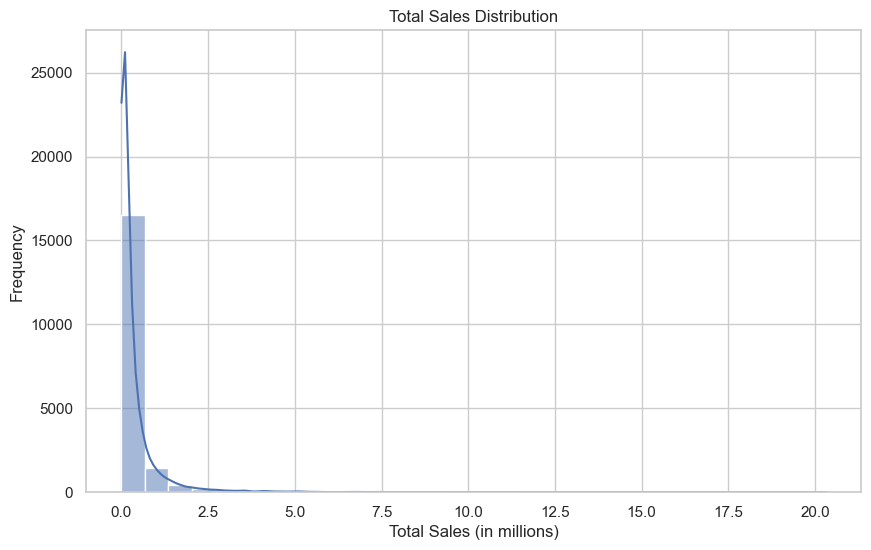

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(data['total_sales'].dropna(), bins=30, kde=True)
plt.title('Total Sales Distribution')
plt.xlabel('Total Sales (in millions)')
plt.ylabel('Frequency')
plt.show()

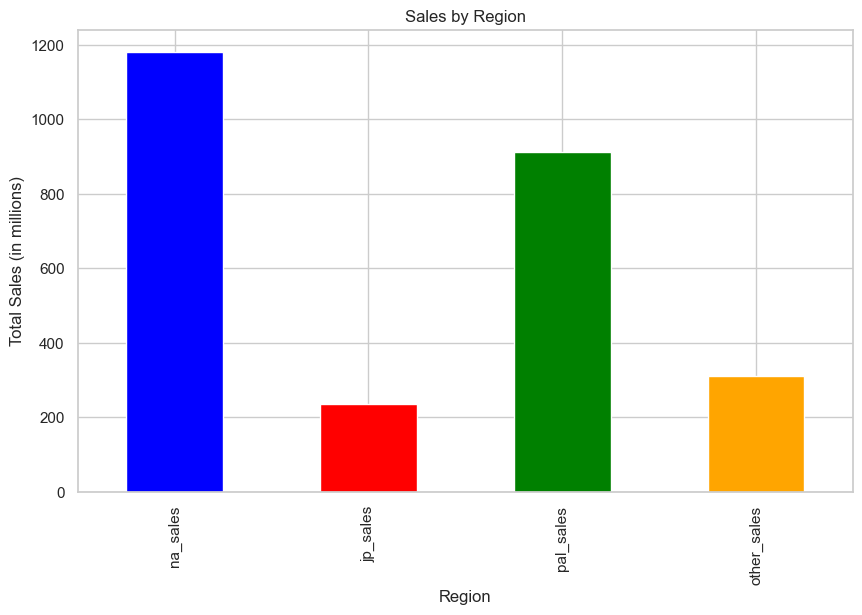

In [13]:
plt.figure(figsize=(10, 6))
sales_data = data[['na_sales', 'jp_sales', 'pal_sales', 'other_sales']].dropna().sum()
sales_data.plot(kind='bar', color=['blue', 'red', 'green', 'orange'])
plt.title('Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales (in millions)')
plt.show()


C:\Users\majjj\AppData\Local\Temp\ipykernel_12240\736668065.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_games, x='total_sales', y='title', palette='viridis')


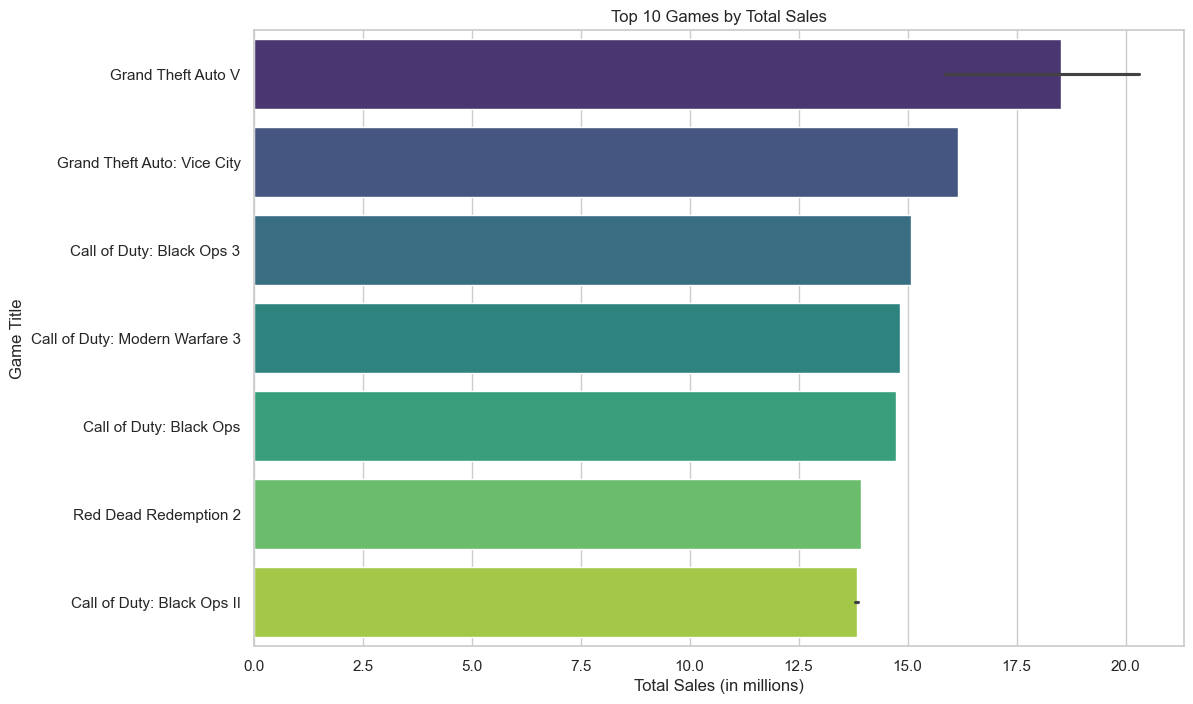

In [14]:
top_n=10
top_games = data[['title', 'total_sales']].dropna().sort_values(by='total_sales', ascending=False).head(top_n)
plt.figure(figsize=(12, 8))
sns.barplot(data=top_games, x='total_sales', y='title', palette='viridis')
plt.title(f'Top {top_n} Games by Total Sales')
plt.xlabel('Total Sales (in millions)')
plt.ylabel('Game Title')
plt.show()

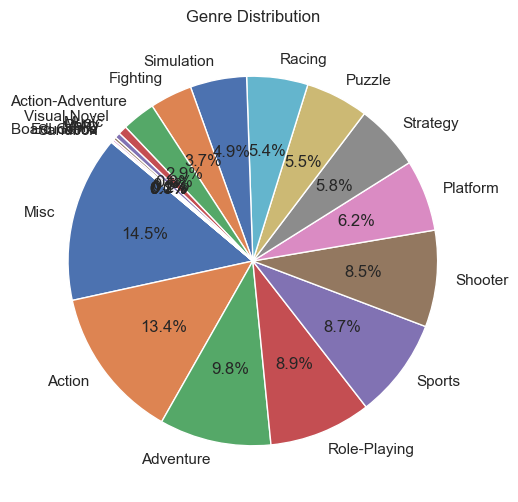

In [15]:
plt.figure(figsize=(10, 6))
genre_data = data['genre'].value_counts()
genre_data.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Genre Distribution')
plt.ylabel('')
plt.show()

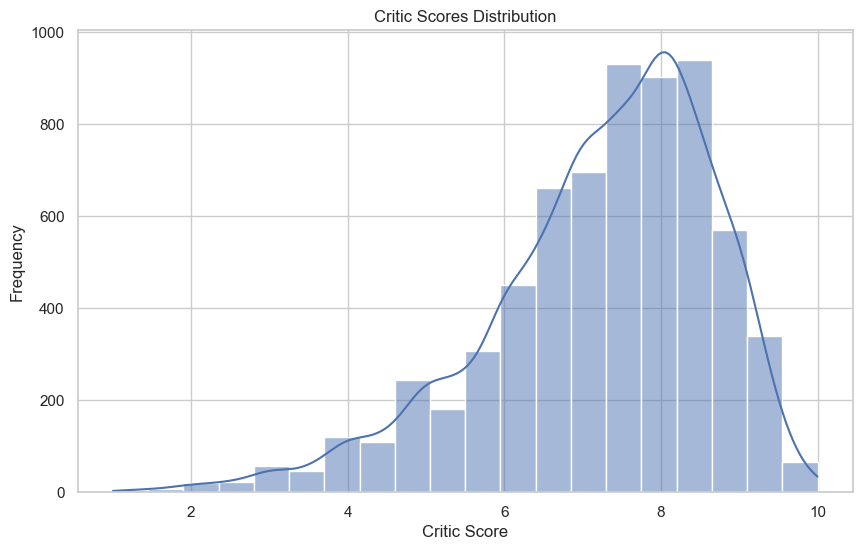

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(data['critic_score'].dropna(), bins=20, kde=True)
plt.title('Critic Scores Distribution')
plt.xlabel('Critic Score')
plt.ylabel('Frequency')
plt.show()

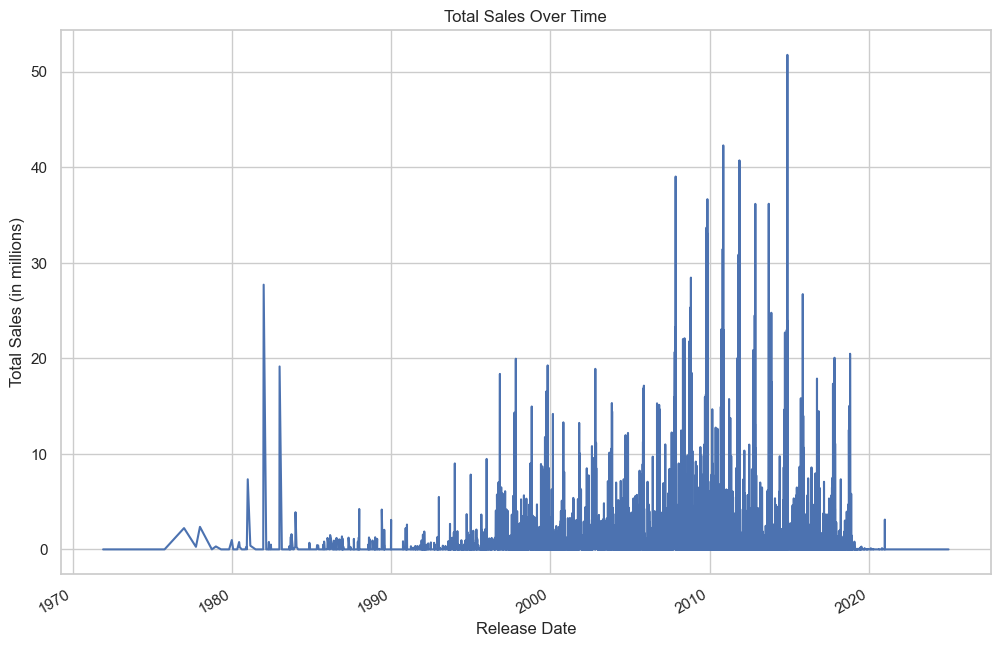

In [17]:
plt.figure(figsize=(12, 8))
data['release_date'] = pd.to_datetime(data['release_date'], errors='coerce')
sales_time_data = data.groupby('release_date')['total_sales'].sum().dropna()
sales_time_data.plot(kind='line')
plt.title('Total Sales Over Time')
plt.xlabel('Release Date')
plt.ylabel('Total Sales (in millions)')
plt.show()

In [18]:
data['release_date'] = pd.to_datetime(data['release_date'], errors='coerce')
data = data.dropna(subset=['release_date', 'total_sales'])

In [19]:
data['release_year'] = data['release_date'].dt.year
data['release_month'] = data['release_date'].dt.month

In [20]:
features = ['critic_score', 'na_sales', 'jp_sales', 'pal_sales', 'other_sales', 'release_year', 'release_month']
target = 'total_sales'


In [21]:
data = data.fillna(0)

In [22]:
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [24]:
y_pred = model.predict(X_test)

In [25]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


In [26]:
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 2.348283922297437e-05
R-squared: 0.9999653354055065
